In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utilis as u
import importlib
import model as m 

Using TensorFlow backend.


In [2]:
importlib.reload(u)
filename = '/data_batch_1'
X_train, y_train,Y_train = u.load_data(filename, reshape=False, clipping=True)
meanX = np.mean(X_train,axis=1)
stdX = np.std(X_train,axis=1)
X_train = (X_train-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/data_batch_2'
X_val, y_val,Y_val = u.load_data(filename, reshape=False, clipping=True)
X_val = (X_val-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/test_batch'
X_test, y_test,Y_test = u.load_data(filename, reshape=False, clipping=True)
X_test = (X_test-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

data = {'X_train':X_train, 'Y_train':Y_train, 'y_train':y_train,'X_val':X_val, 'Y_val':Y_val, 'y_val':y_val, 'X_test':X_test, 'Y_test':Y_test, 'y_test':y_test}

In [4]:
importlib.reload(m)
mlp = m.MLP(lambda_=1e-3, dimensions=[100,60,30,10])
P = mlp.forward_batchnorm(X_train[:100,:1])
mlp.compute_gradients_batchnorm(X_train[:100,:1], Y_train[:,:1],P)

In [6]:
mlp.compare_gradients(X_train[:100,:1], Y_train[:,:1])

c:\Users\User\Desktop\KTH\DeepL\Assignments\DD2424\Assignment3\model.py:395: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
c:\Users\User\Desktop\KTH\DeepL\Assignments\DD2424\Assignment3\model.py:395: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)
c:\Users\User\Desktop\KTH\DeepL\Assignments\DD2424\Assignment3\model.py:282: RuntimeWarning: divide by zero encountered in log
  loss = np.log(np.sum(np.multiply(Y, P), axis=0))
c:\Users\User\Desktop\KTH\DeepL\Assignments\DD2424\Assignment3\model.py:251: RuntimeWarning: invalid value encountered in double_scalars
  x-y)/max(eps, np.abs(x)+np.abs(y))


([nan, 0.018743102890363968, 0.3594731358935327],
 [nan, 0.001397938315586272, 0.007661178802746979],
 [nan, nan, 0.06790534220538545],
 [nan, inf, 0.015114754047131826],
 [0.05, 0.4, 0.0],
 [0.003175776998783538, 0.012334067300094157, 0.0],
 [nan, 1.0, 0.0],
 [nan, 91806.83507554296, 0.0])

In [29]:
importlib.reload(m)
X_train_whole, y_train_whole, Y_train_whole = u.load_data('/data_batch_1', clipping=True)
for i in range(2,6):
    X, y, Y = u.load_data('/data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)

X_val_small, y_val_small, Y_val_small = X_train_whole[:,-5000:], y_train_whole[-5000:], Y_train_whole[:,-5000:]
X_train_whole, y_train_whole, Y_train_whole = X_train_whole[:,:-5000], y_train_whole[:-5000], Y_train_whole[:,:-5000]

filename = '/test_batch'
X_test_45, y_test,Y_test = u.load_data(filename, reshape=False, clipping=True)

## normalize with mean and std of train set 
mean = np.mean(X_train_whole, axis=1)
std = np.std(X_train_whole, axis=1)

X_train_whole -= np.outer(mean, np.ones(X_train_whole.shape[1]))
X_train_whole /= np.outer(std, np.ones(X_train_whole.shape[1]))

X_val_small -= np.outer(mean, np.ones(X_val_small.shape[1]))
X_val_small /= np.outer(std, np.ones(X_val_small.shape[1]))

X_test_45 -= np.outer(mean, np.ones(X_test_45.shape[1]))
X_test_45 /= np.outer(std, np.ones(X_test_45.shape[1]))


data_45 = {'X_train':X_train_whole, 'Y_train':Y_train_whole, 'y_train':y_train_whole,'X_val':X_val_small, 'Y_val':Y_val_small, 'y_val':y_val_small, 'X_test':X_test_45, 'Y_test':Y_test,'y_test':y_test}

In [9]:
importlib.reload(m)
mlp = m.MLP(lambda_=5e-3, dimensions=[3072,50,50,10])
ns = 5*45000/100
GD_params = {"n_batch":100, "eta_min":1e-5, 'eta_max':1e-1, 'ns':ns, 'n_cycles':2, 'freq':10}
model = mlp.cyclicLearning(data_45, GD_params,True, 'test_batchnorm', True, False)

  0%|          | 0/20 [00:00<?, ?it/s]	 Epoch 0: train_cost = 5.201089870307861, val_cost = 5.2280705972086565,  
 	 train_acc = 0.11042222222222223, val_acc = 0.1086
  5%|▌         | 1/20 [00:27<08:44, 27.63s/it]	 Epoch 450.0: train_cost = 3.7245324214041045, val_cost = 3.7518304247159655,  
 	 train_acc = 0.3791555555555556, val_acc = 0.3708
 10%|█         | 2/20 [00:48<07:42, 25.72s/it]	 Epoch 900.0: train_cost = 3.099891058672682, val_cost = 3.137977343950205,  
 	 train_acc = 0.44195555555555555, val_acc = 0.4234
 15%|█▌        | 3/20 [01:10<06:55, 24.43s/it]	 Epoch 1350.0: train_cost = 2.5052712120845184, val_cost = 2.560406984299418,  
 	 train_acc = 0.4729777777777778, val_acc = 0.4498
 20%|██        | 4/20 [01:30<06:12, 23.28s/it]	 Epoch 1800.0: train_cost = 2.0455966309091123, val_cost = 2.0981465387421565,  
 	 train_acc = 0.48444444444444446, val_acc = 0.4656
 25%|██▌       | 5/20 [01:51<05:37, 22.52s/it]	 Epoch 2250.0: train_cost = 1.756463074691134, val_cost = 1.824826712

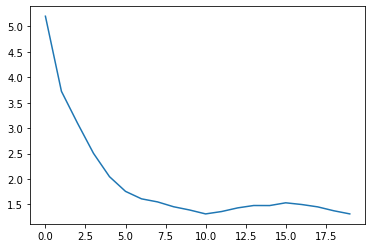

In [15]:
plt.plot(model['train_cost'])

In [16]:
importlib.reload(m)
mlp = m.MLP(lambda_=5e-3, dimensions=[3072,50,50,10],seed=64)
ns = 5*45000/100
GD_params = {"n_batch":100, "eta_min":1e-5, 'eta_max':1e-1, 'ns':ns, 'n_cycles':2, 'freq':10}
model = mlp.cyclicLearning(data_45, GD_params,True, 'test_batchnorm', True, False)

  0%|          | 0/20 [00:00<?, ?it/s]	 Epoch 0: train_cost = 5.706759282871987, val_cost = 5.715375046531115,  
 	 train_acc = 0.09077777777777778, val_acc = 0.0872
  5%|▌         | 1/20 [00:35<11:13, 35.45s/it]	 Epoch 450.0: train_cost = 3.7744359560538108, val_cost = 3.7964874310183823,  
 	 train_acc = 0.36948888888888887, val_acc = 0.3632
 10%|█         | 2/20 [00:59<09:39, 32.17s/it]	 Epoch 900.0: train_cost = 3.1451112160543104, val_cost = 3.1835175849482438,  
 	 train_acc = 0.4338666666666667, val_acc = 0.414
 15%|█▌        | 3/20 [01:24<08:26, 29.81s/it]	 Epoch 1350.0: train_cost = 2.541083942608556, val_cost = 2.5965665700384264,  
 	 train_acc = 0.46244444444444444, val_acc = 0.438
 20%|██        | 4/20 [01:48<07:29, 28.06s/it]	 Epoch 1800.0: train_cost = 2.0478677940685346, val_cost = 2.1074833559056785,  
 	 train_acc = 0.49166666666666664, val_acc = 0.4636
 25%|██▌       | 5/20 [02:13<06:47, 27.16s/it]	 Epoch 2250.0: train_cost = 1.7615066991658845, val_cost = 1.83285380

In [17]:
importlib.reload(m)
mlp = m.MLP(lambda_=5e-3, dimensions=[3072,50,30,20,20,10,10,10,10])
ns = 5*45000/100
GD_params = {"n_batch":100, "eta_min":1e-5, 'eta_max':1e-1, 'ns':ns, 'n_cycles':2, 'freq':10}
model = mlp.cyclicLearning(data_45, GD_params,True, 'test_batchnorm', True, False)

  0%|          | 0/20 [00:00<?, ?it/s]	 Epoch 0: train_cost = 6.36764418051947, val_cost = 6.389780579189183,  
 	 train_acc = 0.09304444444444444, val_acc = 0.1034
  5%|▌         | 1/20 [00:21<06:53, 21.77s/it]	 Epoch 450.0: train_cost = 4.929016840935146, val_cost = 4.95777375818264,  
 	 train_acc = 0.2528888888888889, val_acc = 0.2542
 10%|█         | 2/20 [00:43<06:33, 21.85s/it]	 Epoch 900.0: train_cost = 4.076046847678839, val_cost = 4.096989141630816,  
 	 train_acc = 0.3067111111111111, val_acc = 0.2978
 15%|█▌        | 3/20 [01:05<06:11, 21.83s/it]	 Epoch 1350.0: train_cost = 3.216972990271608, val_cost = 3.230435750966633,  
 	 train_acc = 0.3412222222222222, val_acc = 0.3418
 20%|██        | 4/20 [01:27<05:49, 21.84s/it]	 Epoch 1800.0: train_cost = 2.53344681167867, val_cost = 2.54537140313385,  
 	 train_acc = 0.3874888888888889, val_acc = 0.3824
 25%|██▌       | 5/20 [01:49<05:29, 21.93s/it]	 Epoch 2250.0: train_cost = 2.0720388249072945, val_cost = 2.1128908085910947,  


In [19]:
X_test -= np.outer(mean, np.ones(X_test.shape[1]))
X_test /= np.outer(std, np.ones(X_test.shape[1]))

In [30]:
mlp.ComputeAccuracy(data_45['X_test'],data_45['y_test'],True)

0.52